<a href="https://colab.research.google.com/github/kozz84/Image-analysis/blob/main/Image_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
  <a href="" target="_blank">
  <img alt='Thumbnail for a video showing 3 cool Google Colab features' src="https://lh3.googleusercontent.com/8f6KyXu7OCkY5E4BC1v7kgFbzpscRsT326y8SwrClbMc3ptYRqMHcccIituJQOivN4iP4xCNGbVKLatIvLfnwOEdaJTxNf1YDViDy35FeXh8daUdOyxOqGr0DgLtUoAteTNlqLwneRo24R7JY84i7SebCYo4F5TtmFHA3wsmDS-RIYyAFkmhTEsT4QKR0BvKW6lYnwNy_pjAMXL35JGIchtBFfIFsIzGVKtZLldsOmbFb3D_Ly71HmQvy2zi3xSwe_PLs8aUZ4BjR4sorbomNULOKh6zave_pL0O559h4gcs-r2U5AZLRJaxS-SXhFfUhEPC6I0WPJW3IFpDOqZFP7HFVUPyXwbWvh8jTtl8_hBOJW1GeD7xBqojQxEykMVa7tCIEhbA8izuXVhFZF88qvqFVsspfbtN6Cy3_wL3ksVrzXg-PJ1dXDPvpMwPLxpZV-haviWEuPxDtT_weV6pKgFmEwHmHH9rgPQIXmxStupc-dBGl647taYVeUUmncmTVTIMBBCQMcZByRzf3oKptFwYdGy6Yer-xjYvZ523_VNn4ni_YNU9f4mTaeCKN2AlScHHhrFfDKUTHyuQsbtOjh67GVXSi5j2ibK2Y1VJe7uMr6171k1m232F0d63k4EksMreQRbbVbtflYpcKB7epF1FY6P8SHCWvAKBJjS60joXBYaUdQQly6GreRAtnKkokfy9LJVfn7kC_0nyT0Eth4g_Y1GN3LyHPrmr3dHqrz38B3kaDpsdoyeM5ZGYeglPTz2UKbgHtLXVrK-cfnfORxQf8Ax4jK-VQtxx_v6d6MHPGd18KaSfGRdvYI-EGpIohPLWYlIfvjyuNylJKUU7rWBXHw0vNfHdvtiiI_dw9ZIiY84OqtXRubBPAPMFz--fvZWi17cBDpKOTR-BeK_SJautIcIA3P8QxhimZTw4C3pEIxnouQy22cuUtth2OKkPtTG4lgJIubSPYKxVN9ppVECJRZSefLOBV2giOWgJyZW-Xgr3VygyB2A9=w1658-h269-no?authuser=1" >
  </a>
</center>



# Code

In [2]:
from google.colab import drive
drive.mount('/content/drive')
import scipy
import glob, os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image
import pandas as pd
import seaborn as sns

from skimage import io,morphology
from skimage.restoration import (denoise_tv_chambolle, denoise_bilateral,
                                 denoise_wavelet, estimate_sigma)
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops, regionprops_table,perimeter
from skimage.color import label2rgb



Mounted at /content/drive


In [3]:
def loadfile(filepath):
    img = io.imread(filepath, as_gray=True)
    img = np.array(img).astype(np.int32)
    txtfile= filepath.split('.')[0]+'.txt'
    with open(txtfile,'r') as txt_file:
        txt = txt_file.read()
        del txt_file
        txt=txt.split('\n')
        txt=txt[1:-1]
        sem_dict = {}
        for row in txt:
            row = row.split('=')
            sem_dict.update({row[0]:  row[1]}) 
        width, height = sem_dict['DataSize'].split('x')
        width, height = int(width), int(height)
        if height == 1920:
            img = img[0:1780,0:2560]
            height = 1780
        pixelsize = float(sem_dict['PixelSize'])
        #print('FILE NAME:',sem_dict['ImageName'])
        #print('DATE:',sem_dict['Date'] )   
        #print('IMAGE SIZE [pixels]:', width,'x',height) 
        #print('PIXEL SIZE [nm]:', sem_dict['PixelSize'],)

        #print('IMAGE SIZE [nm]:', 
        #    round(width*float(sem_dict['PixelSize']),0), 
        #    'x',
         #   round(height*float(sem_dict['PixelSize']),0))
        #print('IMAGE AREA [nm]:', width*float(sem_dict['PixelSize'])*height*float(sem_dict['PixelSize']))
        image_area = width*float(sem_dict['PixelSize'])*height*float(sem_dict['PixelSize'])
    textstr = '\n'.join((
        'FILE NAME: '+sem_dict['ImageName'],
        'PIXEL SIZE [nm]: '+str(round(float(sem_dict['PixelSize']),2)),
        'IMAGE SIZE [nm]: '+str(int(width*float(sem_dict['PixelSize'])))+'x'+str(int(height*float(sem_dict['PixelSize'])))))       
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    plt.figure(figsize=(10,10))
    plt.axis('off')
    plt.imshow(img,vmax=255, cmap='gray')
    plt.text(100, 100, textstr, fontsize=14,
        verticalalignment='top', bbox=props)
    plt.show()
    return img, sem_dict,width, height,pixelsize,image_area

In [4]:
def image_info(img):
    im = img.copy()
    print('Max:',im.max())
    print('Min:',im.min())
    print('Median:',np.median(im))
    print('Average:',np.average(im))
    im_flatten = im.flatten()
    print('IMAGE:')
    im_flatten = im.flatten()
    plt.figure(figsize=(5,5))
    plt.axis('off')
    plt.imshow(im,vmax=255, cmap='gray')
    plt.show()

    print('IMAGE HIST:')
    plt.figure(figsize=(4,2))
    plt.hist(im_flatten, bins=256,histtype='stepfilled', range=(im.min(),im.max()))
    plt.yscale('log')
    plt.show()

    median_img=[]
    
    average_img =[]
    max_img = []
    num_rec_x=20
    num_rec_y=20
    rec_size_x = int(int(height)/num_rec_x)
    rec_size_y = int(int(width)/num_rec_y)
    for i in range(num_rec_x):
        for j in range(num_rec_y):
            x_min=i*rec_size_x
            y_min=j*rec_size_y
            x_max=x_min+rec_size_x
            y_max=y_min+rec_size_y
            median_img.append(int(np.median(im[x_min:x_max,y_min:y_max])))
            average_img.append(int(np.average(im[x_min:x_max,y_min:y_max])))
            max_img.append(int(np.max(im[x_min:x_max,y_min:y_max])))
    print('Average:')            
    plt.figure(figsize=(10,8))
    plt.plot(average_img)
    plt.show()
    #plt.plot(max_img)
    plt.boxplot(median_img)
    plt.show()
    Q1 = np.percentile(median_img , 25)
    print(Q1)
    Q3 = np.percentile(median_img , 75)
    print(Q3)
    IQR = Q3 - Q1
    upper_bound = Q3+(1.5*IQR)
    lower_bound = Q1-(1.5*IQR)
    print(upper_bound)
    print(lower_bound)
    median_img = np.reshape(median_img, (20, 20))
    average_img =np.reshape(average_img,(20,20))
    max_img=np.reshape(max_img,(20,20))
    print('Median_HM')
    plt.figure(figsize=(17, 10))
    sns.heatmap(median_img,annot=True,fmt='.0f')
    plt.axis(False)
    plt.show()
    print('Average_HM')
    plt.figure(figsize=(17, 10))
    sns.heatmap(average_img,annot=True,fmt='.0f')
    plt.axis(False)
    plt.show()
    print('max/average_HM')
    plt.figure(figsize=(17, 10))
    sns.heatmap(max_img/average_img,annot=True,fmt='.0f')
    plt.axis(False)
    plt.show()

In [5]:
def uniform(num_rec_x,num_rec_y):
    img2 = np.copy(img)
    #img2 = denoise_tv_chambolle(img2, weight=6)
    rec_size_x = int(int(height)/num_rec_x)
    rec_size_y = int(int(width)/num_rec_y)
    print("Median Rectangle Box size:",rec_size_x,"x", rec_size_y)
    print("Median intensity:",np.median(img))
    median_img=[]
    mask = np.zeros(shape=(1780,2560), dtype=bool)
    for i in range(num_rec_x):
        for j in range(num_rec_y):
            x_min=i*rec_size_x
            y_min=j*rec_size_y
            x_max=x_min+rec_size_x
            y_max=y_min+rec_size_y
            if j == (num_rec_y-1):
                y_max = width
            if i == (num_rec_x-1):
                x_max = height
            median_img.append(np.median(img[x_min:x_max,y_min:y_max]))
            img2[x_min:x_max,y_min:y_max]=img[x_min:x_max,y_min:y_max] - np.median(img[x_min:x_max,y_min:y_max])
    Q1 = np.percentile(median_img , 25)
    Q3 = np.percentile(median_img , 75)
    IQR = Q3 - Q1
    upper_bound = Q3+(1.5*IQR)
    lower_bound = Q1-(1.5*IQR)

    for i in range(num_rec_x):
        for j in range(num_rec_y):
             x_min=i*rec_size_x
             y_min=j*rec_size_y
             x_max=x_min+rec_size_x
             y_max=y_min+rec_size_y
             if np.median(img[x_min:x_max,y_min:y_max]) > upper_bound or np.median(img[x_min:x_max,y_min:y_max]) < lower_bound :
                #print(np.median(img[x_min:x_max,y_min:y_max]))
                img2[x_min:x_max,y_min:y_max] = 0
                mask[x_min:x_max,y_min:y_max] = True
    img2[img2<0] = 0
    mask[0,0:]=True
    mask[-1,0:]=True
    mask[0:,0]=True
    mask[0:,-1]=True
    plt.figure(figsize=(10,10))
    plt.axis('off')
    plt.imshow(img2,vmax=img2.max())
    plt.show()
    unique, counts = np.unique(mask, return_counts=True)
    mask_area = dict(zip(unique, counts))
   # print('usable area: ',round(mask_area[False]/(mask_area[True]+mask_area[False]),2))
    plt.figure(figsize=(10,10))
    plt.axis('off')
    plt.imshow(mask)
    plt.show()
    return img2, median_img,mask, mask_area

In [6]:
def histograms():
    img_flatten = img.flatten()
    img2_flatten = img2.flatten()
    fig, (ax1, ax2) = plt.subplots(2)
    ax1.set_yscale('log')
    ax2.set_yscale('log')
    fig.suptitle('Histograms')
    ax1.hist(img_flatten, bins=256, range=(0,255))
    ax2.hist(img2_flatten, bins=256, range=(0,155))

In [7]:
def segmentation(low,denoise=6,small=15,erosion=1):
    img_denoised = denoise_tv_chambolle(img2, weight=denoise)
    img_denoised = img2.copy()
    img_segm = (img2 > np.median(img_denoised)+low) & (img_denoised <= 255)
    img_segm = clear_border(img_segm,
                          mask=np.invert(scipy.ndimage.binary_dilation(mask,iterations=1))
                          )
    img_segm = morphology.area_closing(img_segm)
    for i in range(erosion):
        img_segm = morphology.binary_erosion(img_segm)
    img_segm = morphology.remove_small_objects(img_segm, small)
    for i in range(erosion-1):     
        img_segm = morphology.binary_dilation(img_segm)
    return img_segm


In [8]:
def label_img():
    img2_label = label(img_segm)
    img2_label = clear_border(img2_label)
    img2_label_overlay = label2rgb(img2_label, bg_label=0)
    props = regionprops(img2_label, extra_properties=())
    props = regionprops_table(img2_label, img2,
                           properties=['mean_intensity',
                                       'area',
                                       'extent',
                                       'eccentricity',
                                       'convex_area',
                                       'equivalent_diameter',
                                       'major_axis_length', 
                                       'minor_axis_length',
                                       'bbox', 'perimeter',
                                       'feret_diameter_max', 
                                       'image',
                                       'convex_image'
                                       ]
                              )
    props = pd.DataFrame(props)
    props['img'] = [img]*len(props)
    for i in range(len(props)):
        props.loc[i,'img'] = [img[int(props['bbox-0'][i]):int(props['bbox-2'][i]),
                                  int(props['bbox-1'][i]):int(props['bbox-3'][i])]]
    data_nm = props.copy()
    data_nm['convex_perimeter'] = data_nm['convex_image'].apply(lambda x: perimeter(x))
    data_nm = data_nm.drop(columns=[
                                 #   'image',
                                    'bbox-0', 
                                    'bbox-1', 
                                    'bbox-2', 
                                    'bbox-3',
                              #      'img',
                           #         'mean_intensity',
                                  #  'convex_image'
                                    ])
    to_nm = ['equivalent_diameter',
       'major_axis_length', 'minor_axis_length', 'perimeter',
       'feret_diameter_max', 'convex_perimeter']

    to_nm2 = ['area', 'convex_area']
    data_nm['circularity'] = np.sqrt(4*np.pi*data_nm['area']/(data_nm['perimeter'])**2)
    data_nm.loc[data_nm['circularity'] >1 ,'circularity'] = 1
    for column in to_nm:
        data_nm[column] = data_nm[column].apply(lambda x:x*pixelsize)
    for column in to_nm2:
        data_nm[column] = data_nm[column].apply(lambda x:x*pixelsize*pixelsize)
    data_nm['aspect_ratio'] = data_nm['minor_axis_length']/data_nm['major_axis_length']
    data_nm['solidity'] =data_nm['area']/data_nm['convex_area']
    data_nm.loc[(data_nm['convex_perimeter'] >data_nm['perimeter']), 'convex_perimeter'] = data_nm.loc[(data_nm['convex_perimeter'] >data_nm['perimeter']), 'perimeter'].values
    data_nm['convexity'] = data_nm['convex_perimeter']/data_nm['perimeter']
    data_nm['filename'] = sem_dict['ImageName'].split('.')[0]
    unique, counts = np.unique(mask, return_counts=True)
    
    data_nm['area_fraction']=data_nm['area']*mask_area[False]/(mask_area[True]+mask_area[False])
    csv_file_name=sem_dict['ImageName'].split('.')[0]
    data_nm.to_csv(csv_file_name+'.csv')
    return img2_label, img2_label_overlay, data_nm

In [9]:
def quick_label_img():
    img2_label = label(img_segm)
    img2_label = clear_border(img2_label, mask=mask)
    particles = img2_label.max()
    return particles

# Single File

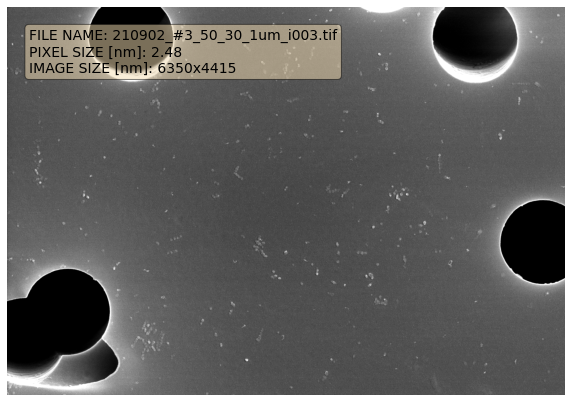

In [ ]:
#@title Load File

file_path = '/content/drive/MyDrive/CIOP/images/#50/210902_#3_50_30_1um_i003.tif' #@param {type:"string"}
show_info = False #@param {type:"boolean"}
img,sem_dict,width, height,pixelsize,image_area = loadfile(file_path)
if show_info:
    print(pd.DataFrame(sem_dict,index=[0]).T)

Median Rectangle Box size: 178 x 256
Median intensity: 85.0


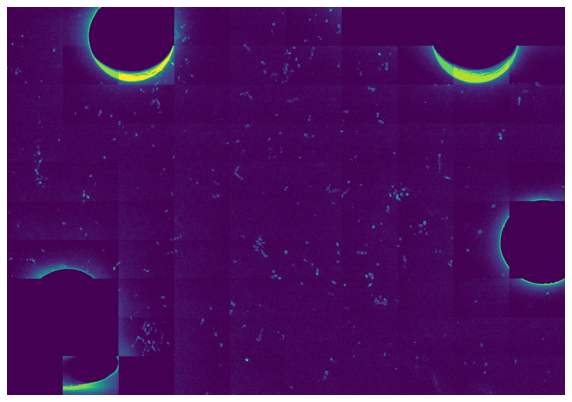

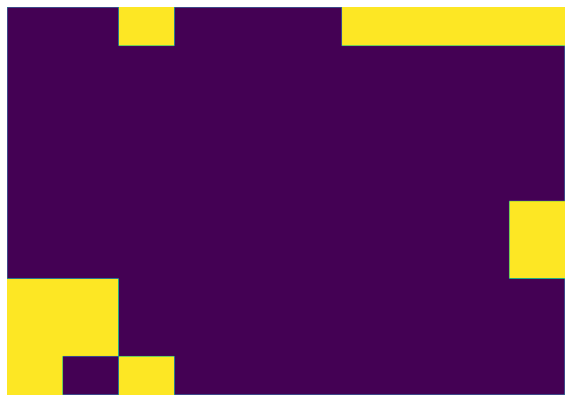

In [ ]:
#@title Number of rectangles [x:x]
#@markdown Insert number of rectangles in the image 
number_slider = 10 #@param {type:"slider", min:2, max:50, step:2}
img2, median_img,mask, mask_area = uniform(number_slider,number_slider)

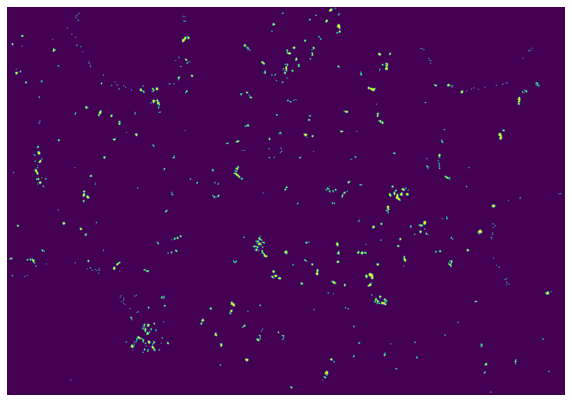

503

In [ ]:
#@title Segmentation and labeling
#@title ## Markdown
#@markdown Image Segmentation
low = 25 #@param {type:"slider", min:1, max:50, step:1}
denoise = 2 #@param {type:"slider", min:1, max:10, step:1}
small = 10 #@param {type:"slider", min:0, max:50, step:1}
erosion =0 #@param {type:"slider", min:0, max:5, step:1}

img_segm = segmentation(low, denoise,small,erosion)
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(img_segm)
plt.show()
img2_label, img2_label_overlay, data_nm = label_img()
len(data_nm)

In [ ]:
data_nm.head(3)

,mean_intensity,area,extent,eccentricity,convex_area,equivalent_diameter,major_axis_length,minor_axis_length,perimeter,feret_diameter_max,image,convex_image,img,convex_perimeter,circularity,aspect_ratio,solidity,convexity,filename,area_fraction
0,29.909091,135.359982,0.407407,0.894906,221.498153,13.128049,24.452051,10.911820,50.211243,24.429786,"[[False, False, False, True, True, False, Fals...","[[False, False, False, True, True, True, True,...","[[[111, 114, 113, 123, 125, 118, 113, 107, 121...",50.211243,0.821389,0.446254,0.611111,1.000000,210902_#3_50_30_1um_i003,117.590360
1,77.347059,1045.963498,0.588235,0.769384,1218.239839,36.493316,46.296690,29.573722,132.169983,48.161996,"[[False, False, False, False, False, False, Fa...","[[False, False, False, False, False, False, Fa...","[[[114, 124, 128, 112, 114, 107, 107, 110, 117...",128.236489,0.867422,0.638787,0.858586,0.970239,210902_#3_50_30_1um_i003,908.652785
2,47.714286,215.345426,0.546875,0.851917,264.567238,16.558572,24.479817,12.819501,60.221259,24.804690,"[[False, False, False, False, True, True, True...","[[False, False, False, False, True, True, True...","[[[94, 84, 84, 95, 120, 125, 124, 114], [87, 8...",59.281956,0.863819,0.523676,0.813953,0.984402,210902_#3_50_30_1um_i003,187.075573


# Iteration

In [10]:
df = pd.DataFrame()

In [11]:
low_adj = 0

In [ ]:
#@title 50 clean
#@title ## Markdown
#@markdown Insert number of rectangles in the image 
number_slider = 20 #@param {type:"slider", min:2, max:50, step:2}

denoise = 1 #@param {type:"slider", min:1, max:10, step:1}
small = 40 #@param {type:"slider", min:0, max:80, step:1}
erosion =0 #@param {type:"slider", min:0, max:5, step:1}

cut_off_min = 1 #@param {type:"slider", min:0, max:50, step:1}
cut_off_max = 40 #@param {type:"slider", min:0, max:50, step:1}
cut_off_step = 1 #@param {type:"slider", min:1, max:10, step:1}
df = pd.DataFrame()
path = "/content/drive/MyDrive/CIOP/images/#50_clean/*.*"


try:
    intensity_df = pd.read_csv(path.split('*')[0]+'intensity_df.csv')
except:
    intensity_df = pd.DataFrame(columns=['filename','intensity']) 
    intensity_df.to_csv(path.split('*')[0]+'intensity_df.csv',index=False)
    
filelist = []
for file in glob.glob(path):
    if file.endswith("tif"): 
        filelist.append(file)
for file in filelist:
    img,sem_dict,width, height,pixelsize,image_area = loadfile(file)
    img2, median_img,mask,mask_area = uniform(number_slider,number_slider)

    if file.split('/')[-1] not in intensity_df['filename'].values:
        print(file.split('/')[-1])
        print(intensity_df['filename'].values)
        print('not in') 
        particles = []
        for i  in range(cut_off_min,cut_off_max,cut_off_step):
            img_segm = segmentation(i,1,small,1)
            props = quick_label_img()
            particles.append([i,props])
        particles = pd.DataFrame(particles, columns=(['low','number of particles']))

        x = particles[(particles['number of particles'] == particles['number of particles'].max())
        | (particles['number of particles'] == particles['number of particles'].min())]['low']
        y = particles[(particles['number of particles'] == particles['number of particles'].max()) 
        | (particles['number of particles'] == particles['number of particles'].min())]['number of particles']

        a,b = np.polyfit(x=x,y=y, deg=1)

        particles['line'] = a*particles['low']+b

        particles['diff']= particles['line']-particles['number of particles']
        plt.figure(figsize=(4,2),dpi=100)
        sns.scatterplot(data=particles,x='low',y='number of particles')
        sns.lineplot(data=particles,x='low',y='line')
        sns.scatterplot(data=particles[particles['diff'] == particles['diff'].max()],x='low',y='number of particles', s=100, color="red", marker="o")
        plt.xlabel('Wartość progowa jasności, T')
        plt.ylabel('Liczba cząstek')
        plt.show()
        low = particles[particles['diff'] == particles['diff'].max()]['low'].values[0]+2
        row ={'filename':file.split('/')[-1],'intensity':low}
        intensity_df = intensity_df.append(row,ignore_index=True)
        intensity_df.to_csv(path.split('*')[0]+'intensity_df.csv',index=False)
    else:
        print('low: ',intensity_df[intensity_df['filename'] == file.split('/')[-1]]['intensity'].values[0])
    low = low_adj+intensity_df[intensity_df['filename'] == file.split('/')[-1]]['intensity'].values[0]
    img_segm = segmentation(low, denoise,small,erosion)
    plt.figure(figsize=(10,10))
    plt.axis('off')
    plt.imshow(img_segm)
    plt.show()
    img2_label, img2_label_overlay, data_nm = label_img()
    data_nm['label'] = 0
    data_nm['filename'] = file.split('/')[-1]
    df = pd.concat([df,data_nm])
    print(len(df))
df_50 = df.copy()

In [ ]:
#@title 150 clean
#@title ## Markdown
#@markdown Insert number of rectangles in the image 
number_slider = 20 #@param {type:"slider", min:2, max:50, step:2}

denoise = 1 #@param {type:"slider", min:1, max:10, step:1}
small = 25 #@param {type:"slider", min:0, max:80, step:1}
erosion =1 #@param {type:"slider", min:0, max:5, step:1}

cut_off_min = 1 #@param {type:"slider", min:0, max:50, step:1}
cut_off_max = 40 #@param {type:"slider", min:0, max:50, step:1}
cut_off_step = 1 #@param {type:"slider", min:1, max:10, step:1}
path = "/content/drive/MyDrive/CIOP/images/#150_clean/*.*"


try:
    intensity_df = pd.read_csv(path.split('*')[0]+'intensity_df.csv')
except:
    intensity_df = pd.DataFrame(columns=['filename','intensity']) 
    intensity_df.to_csv(path.split('*')[0]+'intensity_df.csv',index=False)
    
filelist = []
for file in glob.glob(path):
    if file.endswith("tif"): 
        filelist.append(file)
for file in filelist:
    img,sem_dict,width, height,pixelsize,image_area = loadfile(file)
    img2, median_img,mask,mask_area = uniform(number_slider,number_slider)

    if file.split('/')[-1] not in intensity_df['filename'].values:
        print(file.split('/')[-1])
        print(intensity_df['filename'].values)
        print('not in') 
        particles = []
        for i  in range(cut_off_min,cut_off_max,cut_off_step):
            img_segm = segmentation(i,1,small,1)
            props = quick_label_img()
            particles.append([i,props])
        particles = pd.DataFrame(particles, columns=(['low','number of particles']))

        x = particles[(particles['number of particles'] == particles['number of particles'].max())
        | (particles['number of particles'] == particles['number of particles'].min())]['low']
        y = particles[(particles['number of particles'] == particles['number of particles'].max()) 
        | (particles['number of particles'] == particles['number of particles'].min())]['number of particles']

        a,b = np.polyfit(x=x,y=y, deg=1)

        particles['line'] = a*particles['low']+b

        particles['diff']= particles['line']-particles['number of particles']
        plt.figure(figsize=(4,2),dpi=100)
        sns.scatterplot(data=particles,x='low',y='number of particles')
        sns.lineplot(data=particles,x='low',y='line')
        sns.scatterplot(data=particles[particles['diff'] == particles['diff'].max()],x='low',y='number of particles', s=100, color="red", marker="o")
        plt.xlabel('Wartość progowa jasności, T')
        plt.ylabel('Liczba cząstek')
        plt.show()
        low = particles[particles['diff'] == particles['diff'].max()]['low'].values[0]+2
        row ={'filename':file.split('/')[-1],'intensity':low}
        intensity_df = intensity_df.append(row,ignore_index=True)
        intensity_df.to_csv(path.split('*')[0]+'intensity_df.csv',index=False)
    else:
        print('low: ',intensity_df[intensity_df['filename'] == file.split('/')[-1]]['intensity'].values[0])
    low = low_adj+intensity_df[intensity_df['filename'] == file.split('/')[-1]]['intensity'].values[0]
    img_segm = segmentation(low, denoise,small,erosion)
    plt.figure(figsize=(10,10))
    plt.axis('off')
    plt.imshow(img_segm)
    plt.show()
    img2_label, img2_label_overlay, data_nm = label_img()
    data_nm['label'] = 1
    df = pd.concat([df,data_nm])
    print(len(df))

In [14]:
import scipy.stats

skew = pd.DataFrame(df.select_dtypes(np.number).columns, columns=['Feature'])
skew['skew'] = scipy.stats.skew(df.select_dtypes(np.number))
skew['skew_abs'] = skew['skew'].apply(abs)
skew['skewed'] = skew['skew_abs'].apply(lambda x: True if x>=0.5 else False)

In [15]:
df.to_csv('/content/drive/MyDrive/CIOP/images/'+'df.csv', index=False)

In [16]:
test = pd.read_csv('/content/drive/MyDrive/CIOP/images/df.csv')

In [ ]:
test.groupby('filename').sum()['area_fraction']

In [18]:
len(skew)

17

In [19]:
skew.sort_values('skew_abs',ascending=False)

,Feature,skew,skew_abs,skewed
4,convex_area,6.500214,6.500214,True
1,area,4.863661,4.863661,True
15,area_fraction,4.814997,4.814997,True
8,perimeter,4.262473,4.262473,True
6,major_axis_length,3.269451,3.269451,True
9,feret_diameter_max,3.089374,3.089374,True
10,convex_perimeter,2.800444,2.800444,True
7,minor_axis_length,2.792951,2.792951,True
5,equivalent_diameter,2.023977,2.023977,True
14,convexity,-1.164955,1.164955,True


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def preprocessing(df):
    temp = df[(df['equivalent_diameter']>0)].copy()
    temp = temp[temp['filename']!= '210902_#9_150_30_1um_i005']
    file_col = pd.DataFrame(columns=['filename'])
    file_col['filename'] = temp['filename'].copy()
    for column in skew.query('skewed == True')['Feature'].values:
        temp[column] = np.log1p(temp[column])
    y = temp['label']
    X = temp.drop(['filename','label','image','convex_image','img'],axis=1)
    X_df = X.copy()
    scaler = StandardScaler()
    columns_names = X.columns
    X = scaler.fit_transform(X)
    X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,shuffle=True)
    return X,y,X_train,X_test,y_train,y_test, file_col,columns_names,X_df
X,y,X_train,X_test,y_train,y_test,file_col,columns_names,X_df = preprocessing(df)

In [21]:
from sklearn.cluster import SpectralClustering, KMeans,AgglomerativeClustering,DBSCAN
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,f1_score

In [22]:
cluster_models = {
    'Spectral Clustering':SpectralClustering(n_clusters=2,
                            affinity='nearest_neighbors',
                            assign_labels='kmeans',
                            random_state=464
                            ),
    'Spectral Biclustering': KMeans(n_clusters=2),
    'AgglomerativeClustering':AgglomerativeClustering(),
    "DBSCAN":DBSCAN(eps=9.7, min_samples=2, algorithm='ball_tree', metric='minkowski', leaf_size=90, p=2)
}

cluster_score = []
cluster_results = pd.DataFrame()
cluster_results['true'] = y
for name,cluster_model in cluster_models.items():
    cluster_model.fit(X)
    print(confusion_matrix(y,cluster_model.labels_))
    cluster_score.append([name,accuracy_score(y,cluster_model.labels_)])
    cluster_results[name] = cluster_model.labels_
cluster_score = pd.DataFrame(cluster_score, columns=['model name', 'Accuracy'])
cluster_score.sort_values('Accuracy',ascending=False)

[[1488 4437]
 [1649 4024]]


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[4078 1847]
 [3777 1896]]
[[2411 3514]
 [2240 3433]]
[[5925    0]
 [5673    0]]


,model name,Accuracy
1,Spectral Biclustering,0.515089
3,DBSCAN,0.510864
2,AgglomerativeClustering,0.503880
0,Spectral Clustering,0.475254


In [23]:
correlation = X_df.rename(columns={'mean_intensity': 'I', 
                        'area': 'A',
                        'extent': 'E$_X$', 
                        'eccentricity': 'E$_C$',
                        'convex_area': ' A$_C$',
                        'equivalent_diameter': 'd$_E$',
                        'major_axis_length': 'a', 
                        'minor_axis_length': 'b',
                        'perimeter': 'P',
                        'feret_diameter_max':'F$_{MAX}$',
                        'convex_perimeter':'P$_C$',
                        'circularity':'C',
                        'aspect_ratio': 'AR',
                        'solidity': 'S',
                        'convexity': 'C',
                        'area_fraction': 'A$_F$'
        })

In [24]:
correlation

,I,A,E$_X$,E$_C$,A$_C$,d$_E$,a,b,P,F$_{MAX}$,P$_C$,C,AR,S,C,A$_F$
0,3.812320,6.361918,0.380567,0.574044,6.794749,3.337065,3.733534,3.287625,4.841569,3.936241,4.840176,0.678388,0.631430,0.499730,0.692446,6.249860
1,2.694064,5.691477,0.500000,0.594363,5.978315,3.015114,3.372132,2.858153,4.445740,3.477409,4.327658,0.722974,0.583829,0.559616,0.635148,5.579615
2,2.837127,5.627163,0.441176,0.668569,6.067710,2.984452,3.734422,2.608529,4.431521,3.766786,4.431521,0.710162,0.307829,0.496437,0.693147,5.515328
3,3.571906,6.929862,0.399038,0.606530,7.517882,3.612577,4.165852,3.583596,5.451754,4.207482,5.171558,0.487969,0.551680,0.441594,0.562231,6.817715
4,2.796846,5.845145,0.388889,0.626345,6.372482,3.088545,3.637113,2.954096,4.686994,3.713483,4.551339,0.611952,0.491708,0.463403,0.626988,5.733226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834,4.216389,6.261457,0.544872,0.593088,6.580457,3.288576,3.615260,3.101328,4.706548,3.682513,4.596314,0.739201,0.587026,0.546094,0.639046,6.231954
835,3.995054,6.109579,0.304167,0.677222,6.491242,3.215426,4.005332,2.669982,4.838203,3.953859,4.739296,0.599859,0.249391,0.520128,0.644521,6.080085
836,3.789987,5.581868,0.558442,0.632443,5.845145,2.962882,3.371672,2.656349,4.287337,3.358028,4.251403,0.803369,0.470868,0.569768,0.675091,5.552421
837,4.251348,6.067710,0.432099,0.662517,6.597384,3.195294,3.921064,2.885777,4.724946,3.834371,4.691716,0.658476,0.342084,0.462624,0.676522,6.038219


Text(0.5, 0, 'Characteristic Parameters')

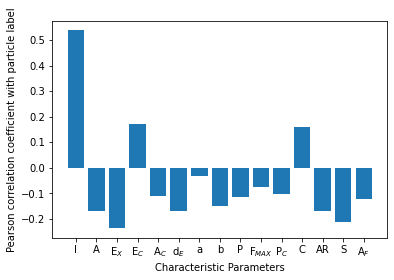

In [25]:
plt.bar(correlation.columns, correlation.corrwith(y).values)
plt.ylabel('Pearson correlation coefficient with particle label')
plt.xlabel('Characteristic Parameters')

#NN

In [26]:
def NN_model():
    model = Sequential()
    model.add(Dense(16,activation='relu'))
    model.add(Dense(10,activation='relu'))
    model.add(Dense(4,activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(optimizer = 'adam',
                loss='binary_crossentropy')
    early_stop = EarlyStopping(monitor='val_loss', 
                            mode='min',
                            verbose=1,
                            patience=25)
    return model


In [27]:
y.value_counts()

0    5925
1    5673
Name: label, dtype: int64

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [29]:
model = Sequential()
model.add(Dense(17,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer = 'adam',
              loss='binary_crossentropy')
early_stop = EarlyStopping(monitor='val_loss', 
                           mode='min',
                           verbose=1,
                           patience=25)

In [30]:
for i in range (10):
    X,y,X_train,X_test,y_train,y_test,file_col,columns_names,X_df = preprocessing(df)
    NN_model()
    model.fit(X_train,
          y_train,
          epochs=250,
          validation_data=(X_test,y_test),
          callbacks=[early_stop],
          verbose=0)
    y_pred = pd.DataFrame((model.predict(X) > 0.5).astype("int32"))
    print(i,accuracy_score(y,y_pred))
    print(confusion_matrix(y,y_pred))

Epoch 112: early stopping
363/363 [==============================] - 1s 1ms/step
0 0.957147784100707
[[5710  215]
 [ 282 5391]]
Epoch 35: early stopping
363/363 [==============================] - 1s 1ms/step
1 0.9577513364373168
[[5678  247]
 [ 243 5430]]
Epoch 35: early stopping
363/363 [==============================] - 1s 1ms/step
2 0.9577513364373168
[[5647  278]
 [ 212 5461]]
Epoch 31: early stopping
363/363 [==============================] - 1s 2ms/step
3 0.9588722193481635
[[5781  144]
 [ 333 5340]]
Epoch 26: early stopping
363/363 [==============================] - 1s 1ms/step
4 0.9612864286946026
[[5755  170]
 [ 279 5394]]
Epoch 35: early stopping
363/363 [==============================] - 1s 2ms/step
5 0.9605104328332471
[[5693  232]
 [ 226 5447]]
Epoch 29: early stopping
363/363 [==============================] - 1s 1ms/step
6 0.9612864286946026
[[5679  246]
 [ 203 5470]]
Epoch 29: early stopping
363/363 [==============================] - 1s 1ms/step
7 0.9618899810312123
[[5

In [31]:
model = Sequential()
model.add(Dense(16,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer = 'adam',
              loss='binary_crossentropy')
early_stop = EarlyStopping(monitor='val_loss', 
                           mode='min',
                           verbose=1,
                           patience=25)

model.fit(X_train,
          y_train,
          epochs=250,
          validation_data=(X_test,y_test),
          callbacks=[early_stop],
          verbose=0)

#y_pred = pd.DataFrame((model.predict(X_test) > 0.5).astype("int32"))
#print(accuracy_score(y_test,y_pred))
#print(confusion_matrix(y_test,y_pred))

Epoch 192: early stopping


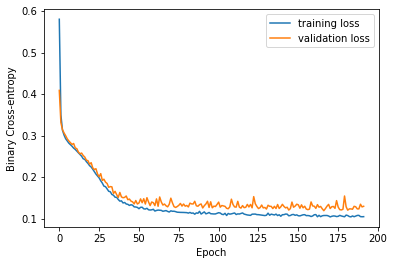

In [32]:
history = pd.DataFrame(model.history.history)
plt.plot(history)
plt.ylabel('Binary Cross-entropy')
plt.xlabel('Epoch')
plt.gca().legend(('training loss','validation loss'))

In [33]:
y_pred = model.predict(X_test)
y_pred = pd.DataFrame((model.predict(X_test) > 0.5).astype("int32"))
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred)) 
print('F1 Score: %.3f' % f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

109/109 [==============================] - 0s 1ms/step
0.953735632183908
[[1706   59]
 [ 102 1613]]
F1 Score: 0.952
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1765
           1       0.96      0.94      0.95      1715

    accuracy                           0.95      3480
   macro avg       0.95      0.95      0.95      3480
weighted avg       0.95      0.95      0.95      3480



# ML

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
models = {
    'K-Neighbors Classifier':KNeighborsClassifier(),
          'Logistic Regression':LogisticRegression(max_iter=500),
          'SVC': SVC(),
         'Decision Tree Classifier':DecisionTreeClassifier(),
          'Random Forest Classifier':RandomForestClassifier(),
      #    'Ad aBoost Classifier':AdaBoostClassifier(),
        #  'Gaussian NB':GaussianNB()
         }
score = []
x=0
#results = pd.DataFrame(y_test)
for name,model in models.items():
    x+=1
    #model.fit(X,y)
   # y_pred = model.predict(X_test)
    cvs = cross_val_score(estimator= model,X=X,y=y,cv=10)
    acc = cvs.mean()
    std = cvs.std()
    #score.append([name,accuracy_score(y_test,y_pred)])
    print(x,'/',len(models),name,round(acc,3),round(std,3))
    #y_pred = cross_val_predict(model, X=X, y=y, cv=10)
    #print(confusion_matrix(y, y_pred)) 
    score.append([name,acc, std])

    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(name)
    print(confusion_matrix(y_test, y_pred)) 
    print('F1 Score: %.3f' % f1_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    classification_report
    #results[name] = y_pred
score = pd.DataFrame(score, columns=['model name', 'Accuracy','std'])

1 / 5 K-Neighbors Classifier 0.875 0.015
K-Neighbors Classifier
[[1579  186]
 [ 273 1442]]
F1 Score: 0.863
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1765
           1       0.89      0.84      0.86      1715

    accuracy                           0.87      3480
   macro avg       0.87      0.87      0.87      3480
weighted avg       0.87      0.87      0.87      3480

2 / 5 Logistic Regression 0.924 0.053
Logistic Regression
[[1655  110]
 [ 147 1568]]
F1 Score: 0.924
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      1765
           1       0.93      0.91      0.92      1715

    accuracy                           0.93      3480
   macro avg       0.93      0.93      0.93      3480
weighted avg       0.93      0.93      0.93      3480

3 / 5 SVC 0.909 0.019
SVC
[[1659  106]
 [ 221 1494]]
F1 Score: 0.901
              precision    recall  f1-score   support

           0  

In [35]:
score = score.sort_values('Accuracy',ascending=False)

In [36]:
#score.append(['NN'],0.94,0.007])

score.loc[len(df.index)] = ['Neural Network',0.94,0.007]
score = score.sort_values('Accuracy',ascending=True)

In [37]:
score

,model name,Accuracy,std
3,Decision Tree Classifier,0.854204,0.020446
0,K-Neighbors Classifier,0.874810,0.015111
4,Random Forest Classifier,0.900334,0.020568
2,SVC,0.908782,0.018518
1,Logistic Regression,0.923530,0.052527
12537,Neural Network,0.940000,0.007000


Text(0, 0.5, 'Machine Learning Model')

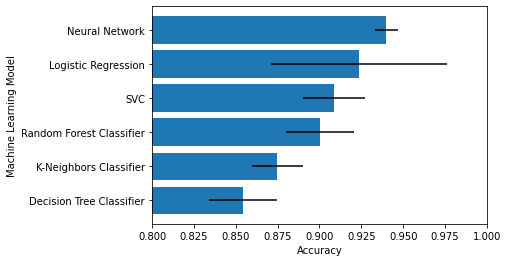

In [38]:
plt.barh(score['model name'],score['Accuracy'],
         xerr=score['std']
         )
plt.xlim([0.80, 1])
plt.xlabel('Accuracy')
plt.ylabel('Machine Learning Model')

# Data presantation

In [39]:
sns_plot_df = df.copy()
sns_plot_df = sns_plot_df.reset_index()


In [40]:
len(df.columns)

21

<AxesSubplot:>

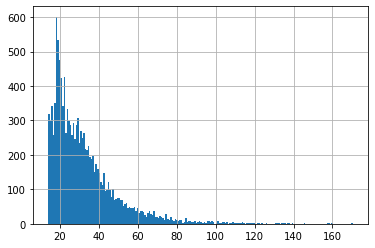

In [41]:
df['equivalent_diameter'].hist(bins=200)

<AxesSubplot:>

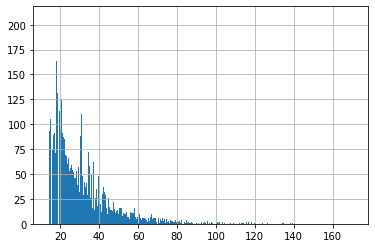

In [42]:
df['equivalent_diameter'].hist(bins=1000)

In [43]:
for i in X_df.sort_values('area',ascending=False).head(10).index.values:
    print(int(i))

198
24
178
456
261
58
414
190
700
48


In [44]:
test = df.reset_index()

In [45]:
data_nm.sort_values('area',ascending=False).head(3)

,mean_intensity,area,extent,eccentricity,convex_area,equivalent_diameter,major_axis_length,minor_axis_length,perimeter,feret_diameter_max,...,convex_image,img,convex_perimeter,circularity,aspect_ratio,solidity,convexity,filename,area_fraction,label
52,39.279918,15012.652562,0.300197,0.894534,40681.827353,138.255933,349.330901,156.151059,1837.670222,315.370930,...,"[[False, False, False, False, False, False, Fa...","[[[108, 91, 109, 117, 103, 96, 102, 104, 104, ...",828.640400,0.236356,0.447000,0.369026,0.450919,210902_#9_150_30_1um_i005,14910.010535,1
276,40.914160,9819.751430,0.331189,0.655926,20180.942789,111.816349,188.172691,142.037495,1027.946799,198.204840,...,"[[False, True, True, True, True, True, True, T...","[[[144, 142, 146, 143, 128, 121, 122, 126, 144...",584.350712,0.341731,0.754825,0.486585,0.568464,210902_#9_150_30_1um_i005,9752.613448,1
203,30.367362,8558.442506,0.283993,0.853570,20193.248242,104.388445,223.115902,116.238492,1239.859476,229.815152,...,"[[False, True, True, True, True, True, True, T...","[[[134, 154, 134, 129, 117, 124, 119, 122, 115...",577.687449,0.264503,0.520978,0.423827,0.465930,210902_#9_150_30_1um_i005,8499.928137,1


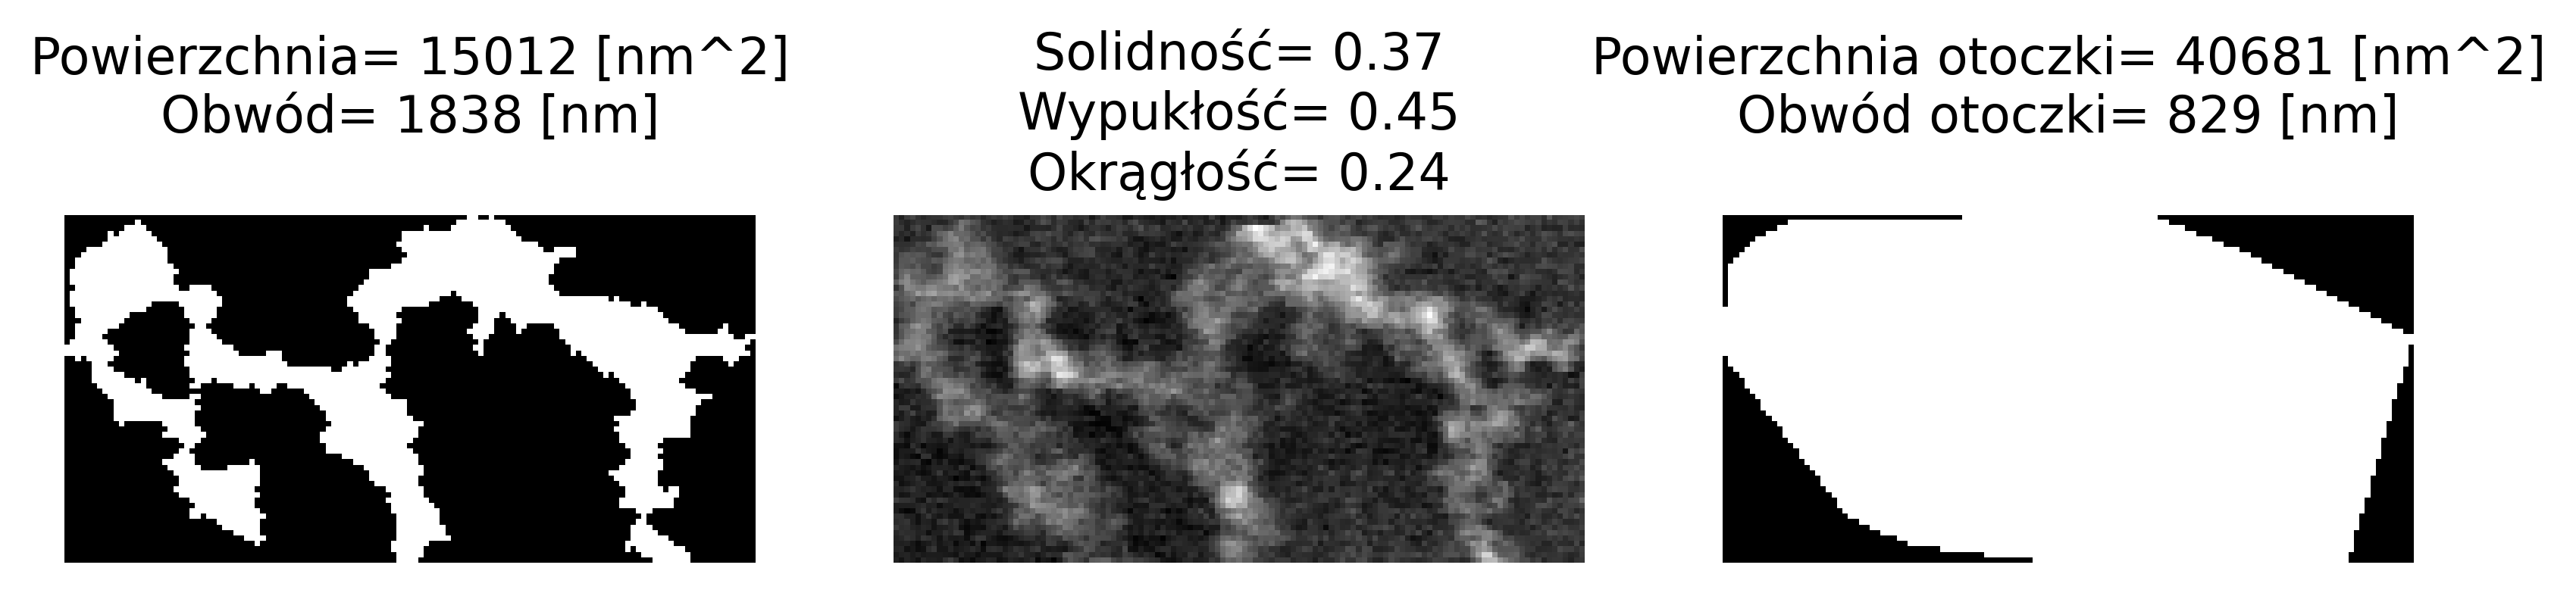

In [46]:
index=52
plt.figure(figsize=(10,10),dpi=400)
plt.subplot(1,3,1)
plt.axis('off')
plt.title('Powierzchnia= '+str(int(data_nm['area'][index]))+' [nm^2]\n'
          'Obwód= '+str(round(data_nm['perimeter'][index]))+' [nm]\n')
plt.imshow(data_nm['image'][index],cmap='gray')
plt.subplot(1,3,2)
plt.axis('off')
plt.title('Solidność= '+str(round(data_nm['solidity'][index],2))+'\n'
        'Wypukłość= '+str(round(data_nm['convexity'][index],2))+'\n'
        'Okrągłość= '+str(round(data_nm['circularity'][index],2)))
plt.imshow(data_nm['img'][index][0],cmap='gray')
plt.subplot(1,3,3)
plt.axis('off')
plt.title('Powierzchnia otoczki= '+str(int(data_nm['convex_area'][index]))+' [nm^2]\n'
           'Obwód otoczki= '+str(round(data_nm['convex_perimeter'][index]))+' [nm]\n')
plt.imshow(data_nm['convex_image'][index],cmap='gray')
plt.show()

<AxesSubplot:title={'center':'Solidity'}>

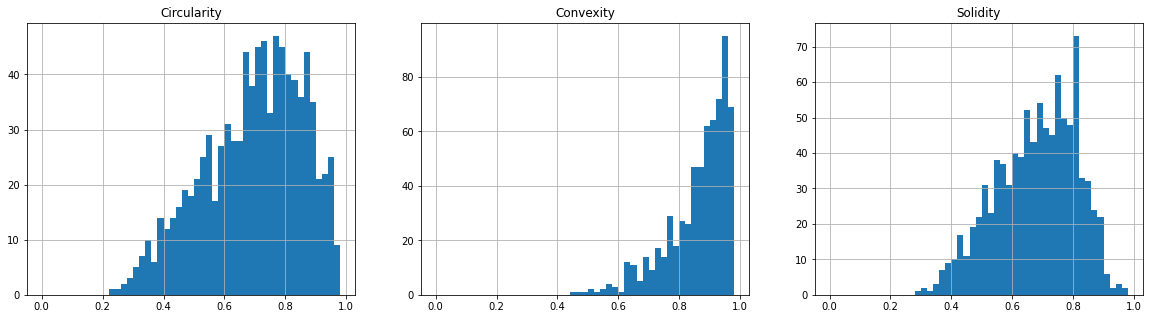

In [47]:
bins = np.arange(0, 1, 0.02)
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.title('Circularity')
data_nm['circularity'].hist(bins=bins)

plt.subplot(1,3,2)
plt.title('Convexity')
data_nm['convexity'].hist(bins=bins)

plt.subplot(1,3,3)
plt.title('Solidity')
data_nm['solidity'].hist(bins=bins)